In [236]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
# from sklearn.metrics import loss_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [158]:
with open("./fico.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

x1;x2;x3;x4;x5;x6;y

Each data point looks like this:

20000;20000;36;6541.67;0.09;0.15;737



In [159]:
data  = pd.read_csv(r'./fico.csv', delimiter=';')
data.head()

,x1,x2,x3,x4,x5,x6,y
0,20000,20000.0,36,6541.67,0.09,0.15,737
1,19200,19200.0,36,4583.33,0.12,0.28,717
2,35000,35000.0,60,11500.00,0.22,0.24,692
3,10000,9975.0,36,3833.33,0.10,0.14,697
4,12000,12000.0,36,3195.00,0.12,0.19,697


In [160]:
# statistical description of the data
data.describe()

,x1,x2,x3,x4,x5,x6,y
count,2500.000000,2500.000000,2500.000000,2499.000000,2500.000000,2500.000000,2500.000000
mean,12406.500000,12001.573236,41.260800,5688.931321,0.130396,0.154312,707.888000
std,7801.544872,7745.320754,9.930893,3963.118185,0.041301,0.075158,35.033161
min,1000.000000,-0.010000,36.000000,588.500000,0.050000,0.000000,642.000000
25%,6000.000000,6000.000000,36.000000,3500.000000,0.100000,0.100000,682.000000
50%,10000.000000,10000.000000,36.000000,5000.000000,0.130000,0.150000,702.000000
75%,17000.000000,16000.000000,36.000000,6800.000000,0.160000,0.210000,727.000000
max,35000.000000,35000.000000,60.000000,102750.000000,0.250000,0.350000,832.000000


In [161]:
data['x4'].replace('', np.nan, inplace=True)

In [162]:
data = data.dropna(subset=['x4'])

In [163]:
# check for null counts
data.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
y     0
dtype: int64

In [164]:
# the number of rows and columns in the data
print('Total Row:', data.shape[0])
print('Total Columns:', data.shape[1])
data.shape

Total Row: 2499
Total Columns: 7


(2499, 7)

In [165]:
features = data.drop(columns=['y'])
label = data[['y']]

print(features.shape)
print(label.shape)

features.columns, label.columns

(2499, 6)
(2499, 1)


(Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object'),
 Index(['y'], dtype='object'))

In [166]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       2499 non-null   int64
dtypes: int64(1)
memory usage: 39.0 KB


In [167]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2499 non-null   int64  
 1   x2      2499 non-null   float64
 2   x3      2499 non-null   int64  
 3   x4      2499 non-null   float64
 4   x5      2499 non-null   float64
 5   x6      2499 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 136.7 KB


In [168]:
col_cat_features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

features[col_cat_features] = features[col_cat_features].astype('int64')


## -- Normalize Data

In [169]:
from sklearn.preprocessing import MinMaxScaler

In [170]:
mx = MinMaxScaler()

In [171]:
# col_features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

# features[col_features] = mx.fit_transform(features[col_features])
# features.head(2)

In [172]:
scale= StandardScaler()
features = scale.fit_transform(features) 
print(features)

[[ 0.97312854  1.03248884 -0.52998264  0.21511291  0.          0.        ]
 [ 0.87056624  0.92918144 -0.52998264 -0.27904137  0.          0.        ]
 [ 2.8961716   2.9695027   1.88685425  1.46665075  0.          0.        ]
 ...
 [-0.30890017 -0.25885373 -0.52998264 -0.88903672  0.          0.        ]
 [-0.82171166 -0.77539075 -0.52998264 -0.55236572  0.          0.        ]
 [-0.43710305 -0.87327452 -0.52998264 -0.45772432  0.          0.        ]]


## -- Split Data

In [ ]:
# X_train, X_validate, y_train, y_validate = train_test_split(
#     features.to_numpy(), label.to_numpy(), test_size=0.3, shuffle=True)

In [311]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, label, test_size=0.3, shuffle=True)

In [325]:
print(X_train.shape)
print(y_train.shape)

(1749, 6)
(1749, 1)


In [326]:
print(X_validate.shape)
print(y_validate.shape)

(750, 6)
(750, 1)


In [251]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(units=1, input_shape=[6], activation='linear'),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(units=1),
    ])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 1e-1),
            # loss='mean_squared_error',
            loss = tf.keras.losses.Huber(),
            metrics=['mae'])

In [252]:
# Train the model
# mc = ModelCheckpoint('ficoscore_model_05.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(X_train, 
                y_train, 
                epochs=400,
                # callbacks = [mc],
                validation_data=(X_validate, y_validate))

Epoch 1/400
55/55 [==============================] - 1s 10ms/step - loss: 568.6425 - mae: 569.1423 - val_loss: 83.2276 - val_mae: 83.7276
Epoch 2/400
55/55 [==============================] - 0s 6ms/step - loss: 59.1963 - mae: 59.6947 - val_loss: 46.7657 - val_mae: 47.2638
Epoch 3/400
55/55 [==============================] - 0s 6ms/step - loss: 63.8933 - mae: 64.3928 - val_loss: 71.6773 - val_mae: 72.1765
Epoch 4/400
55/55 [==============================] - 0s 5ms/step - loss: 59.2293 - mae: 59.7274 - val_loss: 73.7850 - val_mae: 74.2847
Epoch 5/400
55/55 [==============================] - 0s 4ms/step - loss: 59.6930 - mae: 60.1916 - val_loss: 39.1664 - val_mae: 39.6619
Epoch 6/400
55/55 [==============================] - 0s 4ms/step - loss: 58.3024 - mae: 58.8011 - val_loss: 77.6024 - val_mae: 78.1017
Epoch 7/400
55/55 [==============================] - 0s 4ms/step - loss: 60.1093 - mae: 60.6079 - val_loss: 54.2575 - val_mae: 54.7567
Epoch 8/400
55/55 [==============================] -

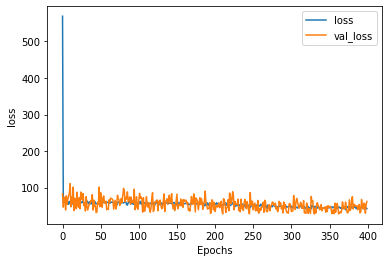

In [253]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
# plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [262]:
print(type(y_validate))
y_pred = pd.DataFrame(model.predict(X_validate), columns = ['y_pred'])
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [349]:
print(y_validate)
print(y_pred)

       y
0    662
1    702
2    697
3    757
4    702
..   ...
745  747
746  682
747  707
748  662
749  742

[750 rows x 1 columns]
         y_pred
0    793.829407
1    742.560730
2    681.524719
3    803.425842
4    749.296265
..          ...
745  744.083862
746  733.202087
747  792.642334
748  802.511597
749  780.989502

[750 rows x 1 columns]


<AxesSubplot:xlabel='index', ylabel='y_pred'>

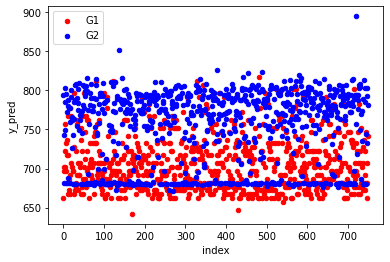

In [331]:
ax = y_validate.reset_index().plot(kind='scatter', x='index', y='y',
                                           color='Red', label='G1')
y_pred.reset_index().plot(kind='scatter', x='index', y='y_pred',
                                          color='Blue', label='G2', ax=ax)

In [351]:
y_val = y_validate['y'].to_list()
y_pred = y_pred['y_pred'].to_list()

In [364]:
list_y = pd.DataFrame(np.column_stack([y_val, y_pred]), 
                               columns=['y_val', 'y_pred'])

<AxesSubplot:>

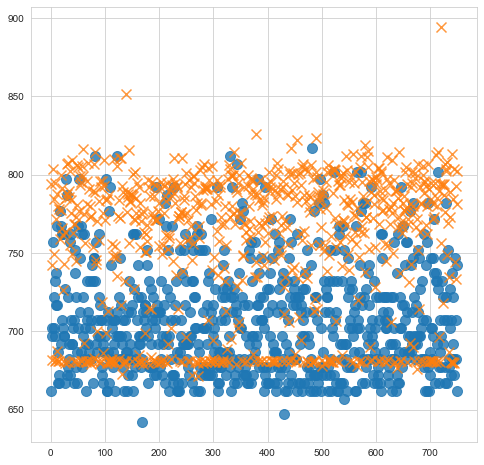

In [365]:
df1 = [2.5, 2.5, 2, 3, 4, 3.5]
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(ax=ax, x=df1)

index = list(range(1,751))

# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_val']), scatter=True, fit_reg=False, marker='o',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker
# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_pred']), scatter=True, fit_reg=False, marker='x',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker

In [300]:
import pandas as pd

In [233]:
new_model = tf.keras.models.load_model('./ficoscore_model_05.h5')

# Check its architecture
new_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 6)                 0         
                                                                 
 dense_56 (Dense)            (None, 1)                 7         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [234]:
scores = []
score = new_model.evaluate(X_validate, y_validate, verbose = 1)


24/24 [==============================] - 0s 3ms/step - loss: 1190.5366 - accuracy: 0.0000e+00
